# Housing Prices

This introduces both the test and train datasets for Housing Prices


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Exploration And Analysis

In [2]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [8]:
Train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [18]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

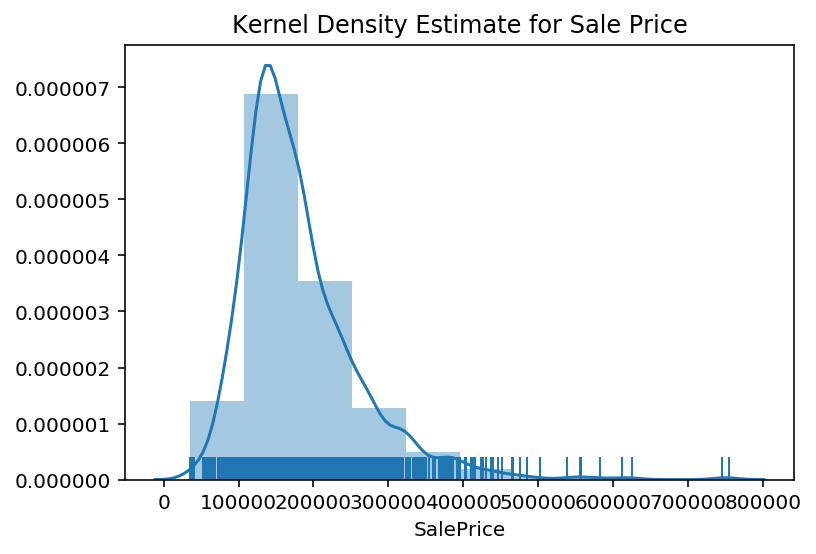

In [9]:
x = Train['SalePrice'].mean()
tmp_y_train = Train['SalePrice'].fillna(x)
sns.distplot(tmp_y_train,kde = True, bins = 10, rug = True).set_title("Kernel Density Estimate for Sale Price")
(mu,sigma) = norm.fit(tmp_y_train)

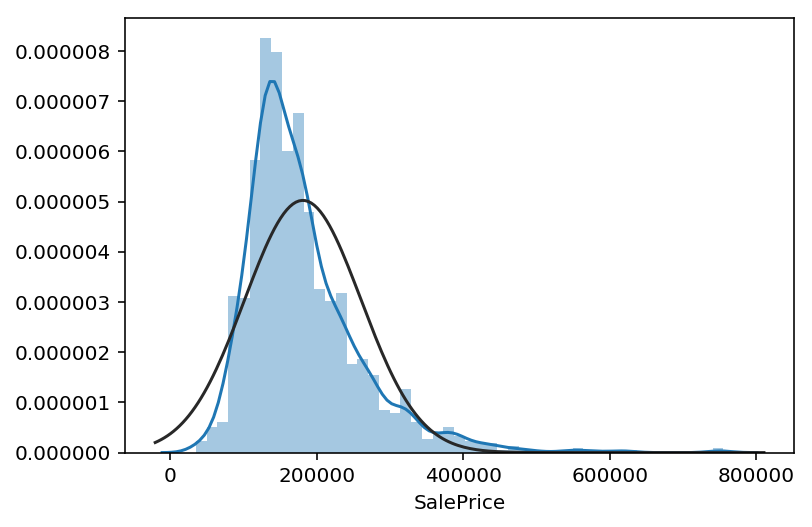

In [10]:

sns.distplot(Train['SalePrice'] , fit=norm);

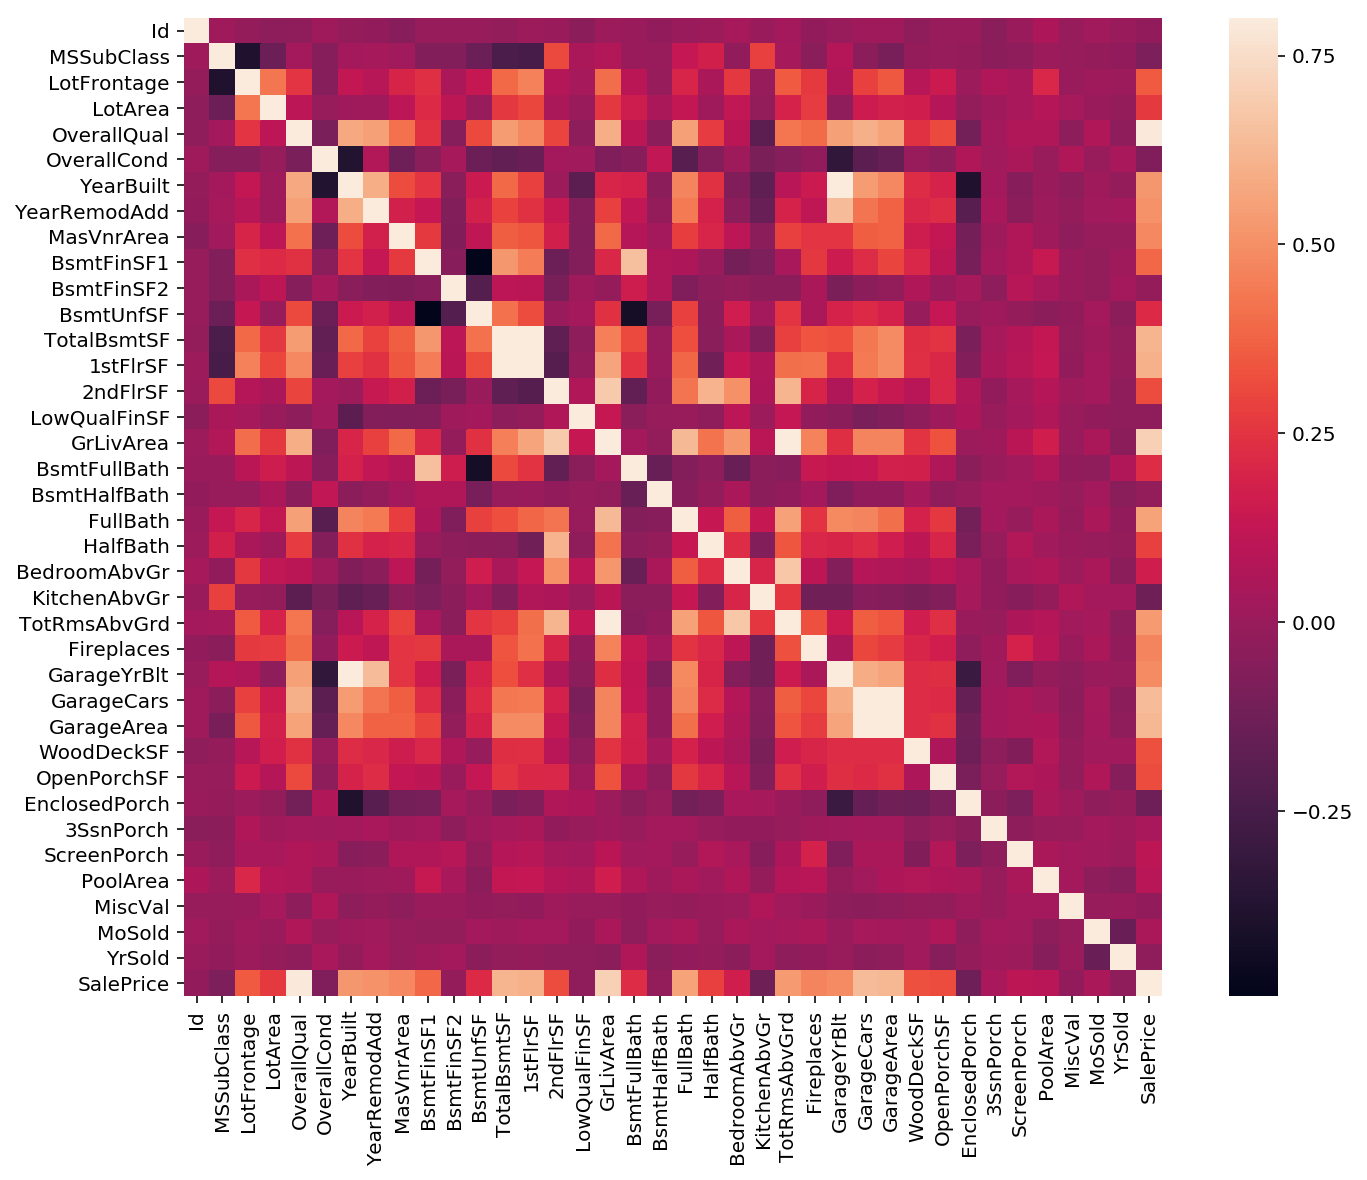

In [11]:
corrmat = Train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Text(0.5,1,'Lot Area vs. Sale Prices')

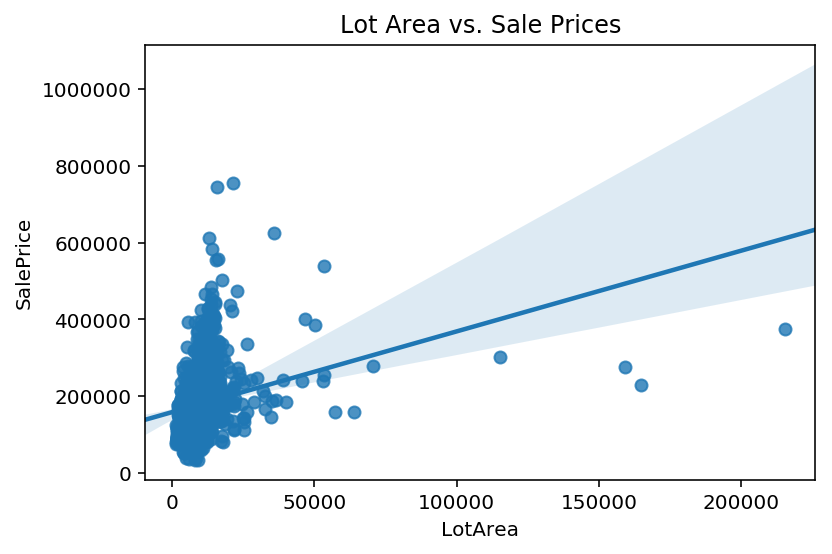

In [12]:
sns.regplot(x="LotArea",y="SalePrice", data = Train).set_title("Lot Area vs. Sale Prices")

Text(0.5,1,'Basment SF vs Sale Prices')

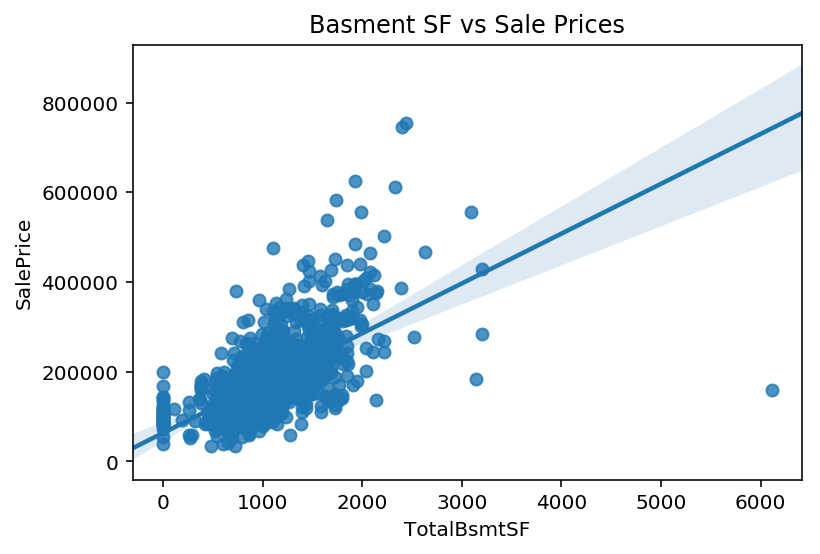

In [13]:
sns.regplot(x="TotalBsmtSF",y="SalePrice", data = Train).set_title("Basment SF vs Sale Prices")

Text(0.5,1,'GrLivArea vs Sale Prices')

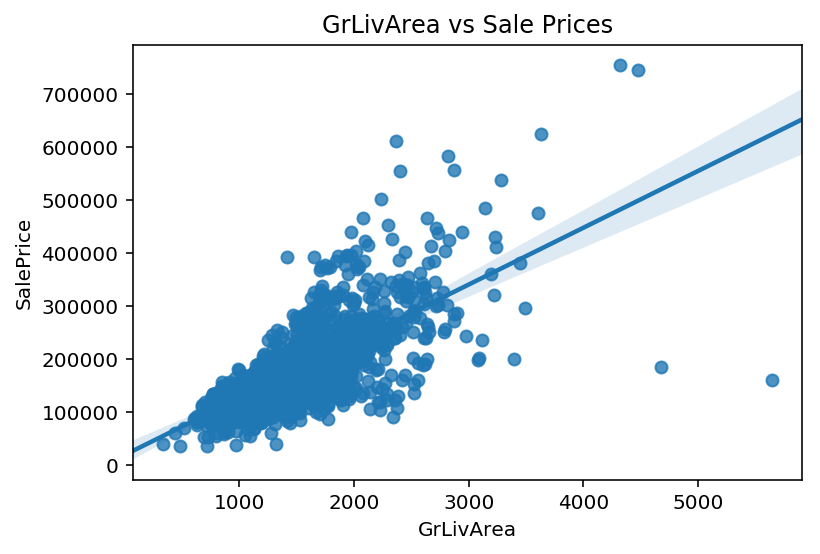

In [20]:
sns.regplot(x="GrLivArea",y="SalePrice", data = Train).set_title("GrLivArea vs Sale Prices")

Text(0.5,1,'Garage Area vs Sale Prices')

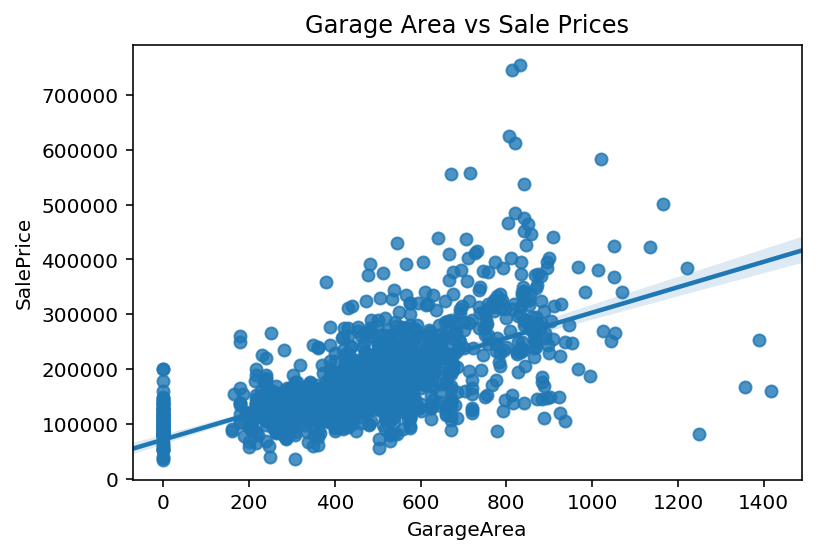

In [21]:
sns.regplot(x="GarageArea",y="SalePrice", data =Train).set_title("Garage Area vs Sale Prices")

Text(0.5,1,'Overall Quality vs. Sale Prices')

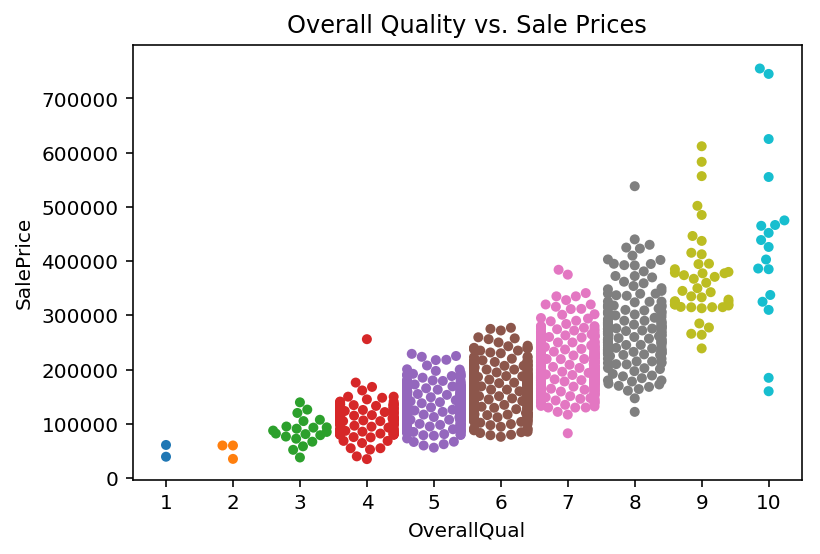

In [22]:
sns.swarmplot(x="OverallQual", y = "SalePrice", data = Train).set_title("Overall Quality vs. Sale Prices")

Text(0.5,1,'Overall Condition vs. Sale Prices')

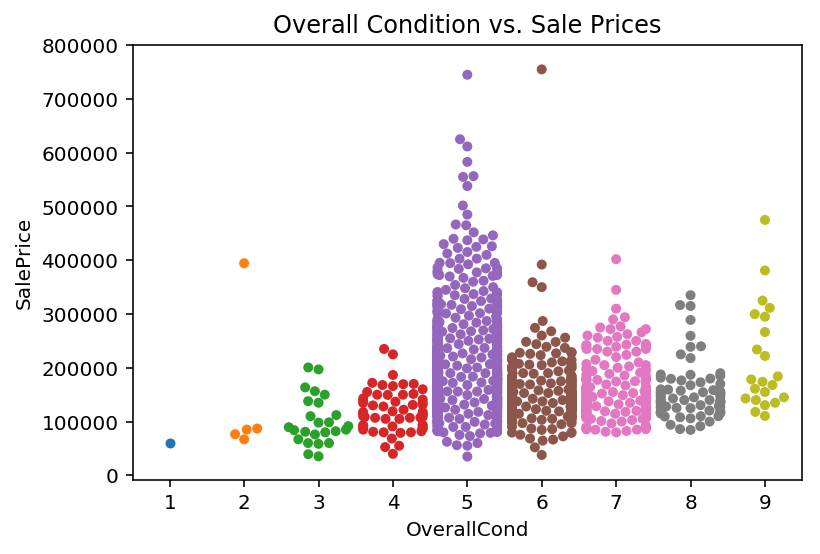

In [23]:
sns.swarmplot(x="OverallCond", y = "SalePrice", data = Train).set_title("Overall Condition vs. Sale Prices")

In [14]:
NA_Data = (Train.isnull().sum() / len(Train)) * 100
NA_Data = NA_Data.drop(NA_Data[NA_Data == 0].index).sort_values(ascending=False)[:30]
MissingData = pd.DataFrame({'Missing Ratio' :NA_Data})
MissingData

Missing Ratio
PoolQC            99.520548
MiscFeature       96.301370
Alley             93.767123
Fence             80.753425
FireplaceQu       47.260274
LotFrontage       17.739726
GarageYrBlt        5.547945
GarageType         5.547945
GarageFinish       5.547945
GarageQual         5.547945
GarageCond         5.547945
BsmtFinType2       2.602740
BsmtExposure       2.602740
BsmtFinType1       2.534247
BsmtCond           2.534247
BsmtQual           2.534247
MasVnrArea         0.547945
MasVnrType         0.547945
Electrical         0.068493

In [25]:
length_Train = Train.shape[0]
length_Test = Test.shape[0]
y_Train = Train.SalePrice.values
df = pd.concat((Train,Test)).reset_index(drop=True)

In [26]:
all_data = pd.concat((Train.loc[:,'MSSubClass':'SaleCondition'],Test.loc[:,'MSSubClass':'SaleCondition']))
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

new_train = all_data[:Train.shape[0]]
new_test = all_data[Train.shape[0]:]
y_new = Train.SalePrice

# Cross Validation

The test and train sets are split. X represents our chosen indepedent variables and Y represents SalesPrice

In [27]:
X = new_train

In [28]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
0          2003       196.0       706.0         0.0          ...             
1          1976         0.0       978.0         0.0          ...             
2          2002       162.0       486.0         0.0          ...             
3          1970         0.0       216.0         0.0          ...             
4          2000       350.0       655.0         0.0          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 288 columns]

In [30]:
y = Train['SalePrice']

In [31]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_y, Test_y = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)
Train_X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
133           20    69.305795     6853            8            5       2001   
290           60   120.000000    15611            8            5       2006   
24            20    69.305795     8246            5            8       1968   
1093          20    71.000000     9230            5            8       1965   
1288         120    40.000000     5664            8            5       2000   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
133           2002       136.0      1005.0         0.0          ...             
290           2006         0.0         0.0         0.0          ...             
24            2001         0.0       188.0       668.0          ...             
1093          1998       166.0       661.0         0.0          ...             
1288          2000         0.0      1158.0         0.0          ...             

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
133                0             0             0            1   
290                0             1             0            0   
24                 0             0             0            1   
1093               0             0             0            1   
1288               0             0             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
133                       0                      0                     0   
290                       0                      0                     0   
24                        0                      0                     0   
1093                      0                      0                     0   
1288                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
133                      0                     1                      0  
290                      0                     0                      1  
24                       0                     1                      0  
1093                     0                     1                      0  
1288                     0                     1                      0  

[5 rows x 288 columns]

# K Cross Validation

A form of model tuning in order to get the best model possible

In [35]:
from sklearn.model_selection import cross_val_score

def rmse_cross_validation(model):
    rmse = np.sqrt(-cross_val_score(model,Train_X,Train_y,scoring="neg_mean_squared_error",cv = 5))
    return (rmse)
def r2_cross_validation(model):
    r2 = cross_val_score(model,Train_X,Train_y,scoring="r2")
    return (r2)

# Random Forest Regressor

Random Forest will be ran twice: First, all the independent variables will be used then again after identifying the most significant features


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
clf =  RandomForestRegressor(n_estimators = 500, n_jobs = -1)
clf.fit(Train_X,Train_y)

pred_y = clf.predict(Test_X)

print ("R Squared Score: ",r2_cross_validation(clf).mean())
RMSE = sqrt(mean_squared_error(Test_y,pred_y))
print ("RMSE Score: ",RMSE)
R2 = r2_score(Test_y,pred_y)

R Squared Score:  0.8122569618366778
RMSE Score:  27372.622105079834


Text(0,0.5,'Predicted Sales Prices')

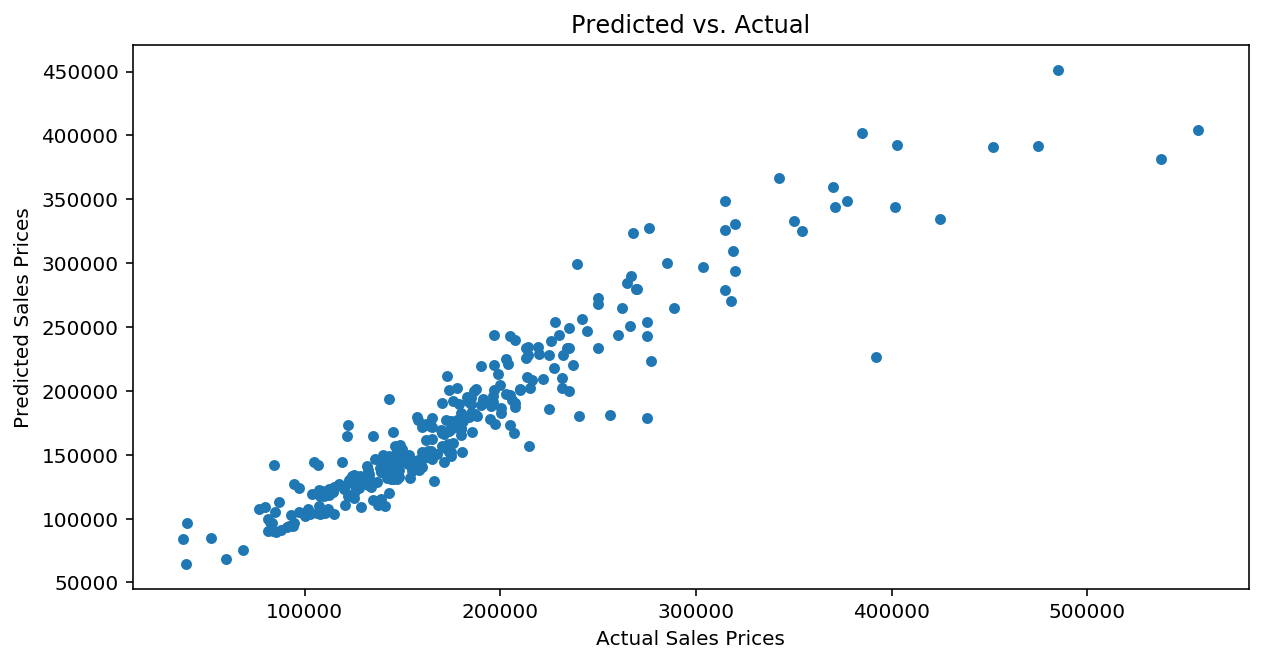

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(Test_y,pred_y,s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sales Prices')
plt.ylabel('Predicted Sales Prices')

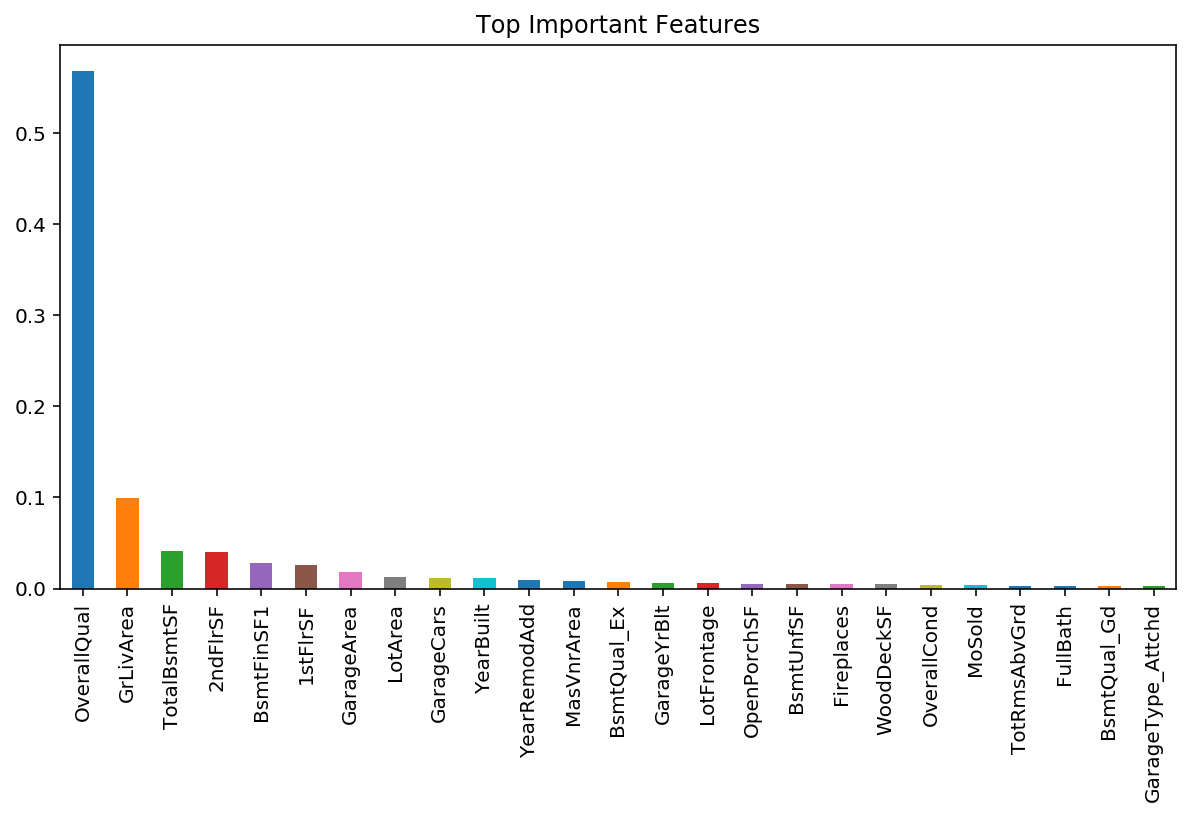

In [38]:
coef = pd.Series(clf.feature_importances_,index= Train_X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title('Top Important Features')
coef.head(25).plot(kind='bar')

In [39]:
#This is for the small matrix of features to use for Random Forest
X = new_train[['OverallQual','GrLivArea','TotalBsmtSF','2ndFlrSF']]
train_X1, test_X1, train_y1, test_y1 = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)
clf =  RandomForestRegressor(n_estimators = 500, n_jobs = -1)
clf.fit(train_X1,train_y1)

pred_y1 = clf.predict(test_X1)

print ("R Squared Score: ",r2_cross_validation(clf).mean())
RMSE = sqrt(mean_squared_error(test_y1,pred_y1))
print ("RMSE Score: ",RMSE)
R2 = r2_score(test_y1,pred_y1)

R Squared Score:  0.8127926099384543
RMSE Score:  32833.50656592802


Text(0,0.5,'Predicted Sales Prices')

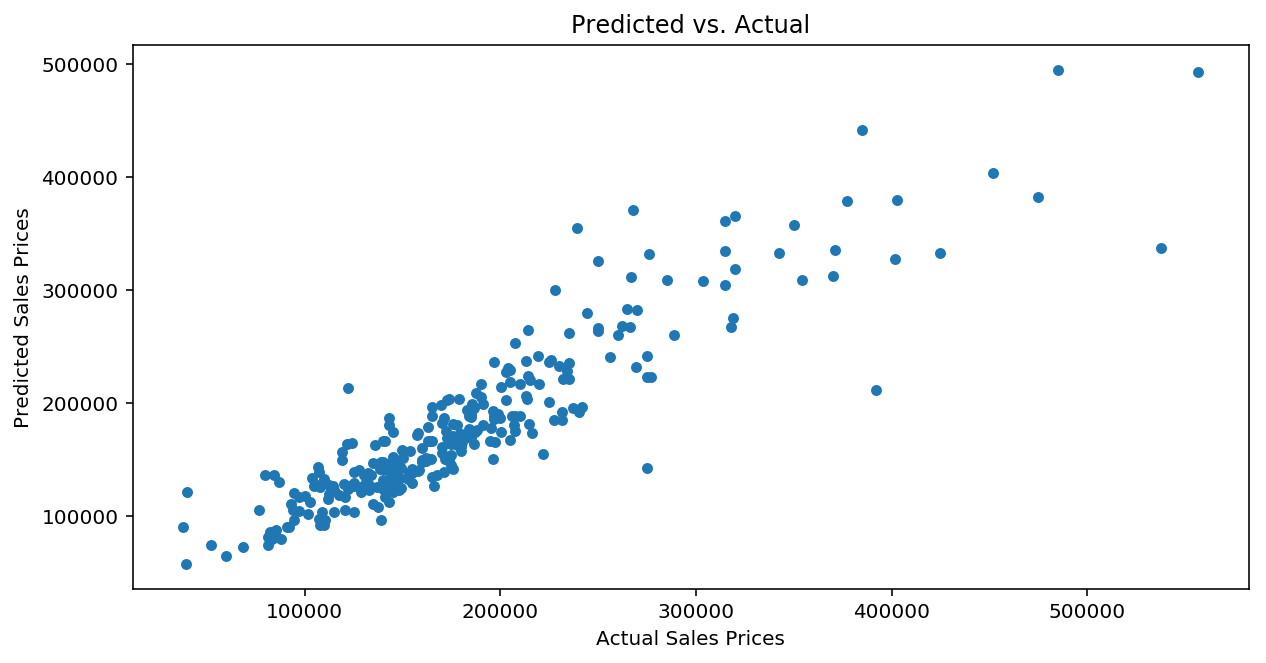

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(test_y1,pred_y1,s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sales Prices')
plt.ylabel('Predicted Sales Prices')